### Problem 1 (50 points) 

Vapor-liquid equilibria data are correlated using two adjustable parameters $A_{12}$ and $A_{21}$ per binary
mixture. For low pressures, the equilibrium relation can be formulated as:

$$
\begin{aligned}
p = & x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{water}^{sat}\\
& + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$

Here the saturation pressures are given by the Antoine equation

$$
\log_{10}(p^{sat}) = a_1 - \frac{a_2}{T + a_3},
$$

where $T = 20$($^{\circ}{\rm C}$) and $a_{1,2,3}$ for a water - 1,4 dioxane
system is given below.

|             | $a_1$     | $a_2$      | $a_3$     |
|:------------|:--------|:---------|:--------|
| Water       | 8.07131 | 1730.63  | 233.426 |
| 1,4 dioxane | 7.43155 | 1554.679 | 240.337 |


The following table lists the measured data. Recall that in a binary system $x_1 + x_2 = 1$.

|$x_1$ | 0.0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 |
|:-----|:--------|:---------|:--------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
|$p$| 28.1 | 34.4 | 36.7 | 36.9 | 36.8 | 36.7 | 36.5 | 35.4 | 32.9 | 27.7 | 17.5 |

Estimate $A_{12}$ and $A_{21}$ using data from the above table: 

1. Formulate the least square problem; 


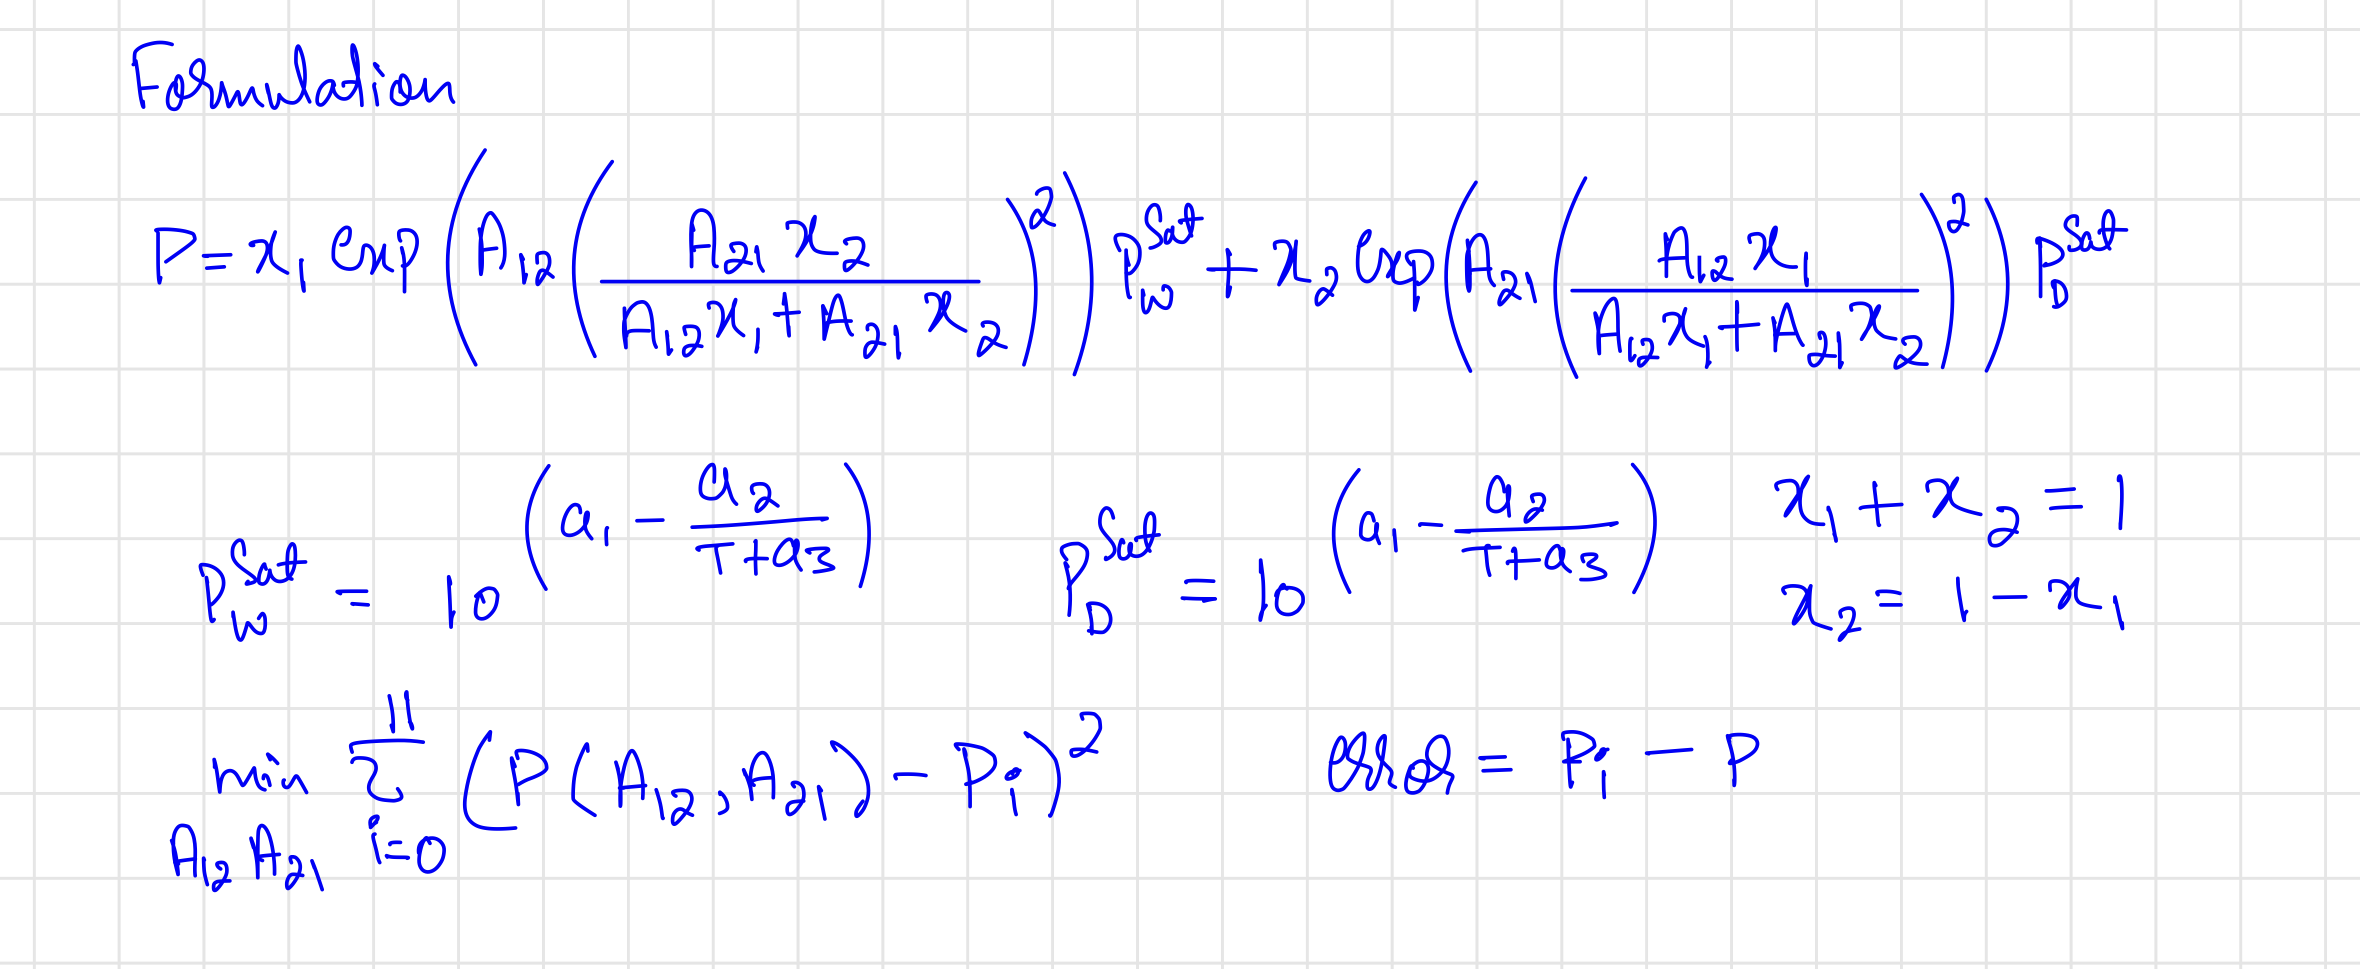

In [64]:
# Spam code
from scipy.optimize import minimize
from numpy import linspace
pstaw = 10 ** (8.07131 - (1730.60/(20 + 233.426)))
psatd = 10 ** (7.43155 - (1554.679/(20 + 240.337)))
x1knob = linspace(0, 1, 11)
for i in x1knob:
    x2knob = 1 - x1knob
    press = lambda x: (x1knob[i]*exp(x[0]*((x[1]*x2knob[i])/(x[0]*x1knob[i] + x[1]*x2knob[i])) ** 2) * psatw + 
                      (x2knob[i]*exp(x[1]*((x[0]*x1knob[i])/(x[0]*x1knob[i] + x[1]*x2knob[i])) ** 2)* psatd))
    cons ({'type': 'eq' : x1knob + x2knob - 1})
    res = minimize(press, (1, 1), method='SLSQP',bounds=None, constraints=cons)
    res

SyntaxError: invalid syntax (<ipython-input-64-bf0e3211a547>, line 11)

2. Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent or Newton's method implemented in HW1; 

In [10]:
# PyTorch for gradient descent
import numpy
import torch
import math
from matplotlib import pyplot
# from scipy import exp as exp
# from scipy import gradient
from torch.autograd import Variable

psatw = 10 ** (8.07131 - (1730.60/(20 + 233.426)))
psatd = 10 ** (7.43155 - (1554.679/(20 + 240.337)))
x1knob = numpy.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x2knob = 1 - x1knob
p = numpy.array([28.1, 34.4, 36.7, 36.9, 36.8,36.7, 36.5, 35.4, 32.9, 27.7, 17.5])
x = Variable(torch.tensor([1.0, 1.0]), requires_grad=True)
p_err_data = []

# Fix the step size
a = 0.001

# Start gradient descent
for i in range(500): 
    for i in range(0, len(x1knob)):
        
        loss = ((((x1knob[i] * torch.exp( x[0] * ((x[1] * x2knob[i])/(x[0] * x1knob[i] + x[1] * x2knob[i])) ** 2)) * psatw) 
                + (x2knob[i] * torch.exp( x[1] * ((x[0] * x1knob[i])/(x[0] * x1knob[i] + x[1] * x2knob[i])) ** 2) * psatd)) 
                - p[i]) ** 2
        loss.backward()
    x.grad.numpy()
    with torch.no_grad():
        x -= a * x.grad
        # print(x)
        # need to clear the gradient at every step
        x.grad.zero_()
        
print(x.data.numpy())
print(loss.data.numpy())

[1.9580663 1.688802 ]
0.00048330065


3. Compare your optimized model with the data. Does your model fit well with the data?

Data of P from table  28.1 P error =  28.824099527405245 Error is  -0.7240995274052437
Data of P from table  34.4 P error =  34.64406462827729 Error is  -0.24406462827729314
Data of P from table  36.7 P error =  36.453046181876154 Error is  0.2469538181238491
Data of P from table  36.9 P error =  36.867674125361134 Error is  0.032325874638864605
Data of P from table  36.8 P error =  36.87443165071541 Error is  -0.07443165071541102
Data of P from table  36.7 P error =  36.750077574362734 Error is  -0.050077574362731525
Data of P from table  36.5 P error =  36.39031934146459 Error is  0.1096806585354102
Data of P from table  35.4 P error =  35.384302807018905 Error is  0.01569719298109362
Data of P from table  32.9 P error =  32.947248686533165 Error is  -0.04724868653316605
Data of P from table  27.7 P error =  27.730661636739956 Error is  -0.030661636739957032
Data of P from table  17.5 P error =  17.478015502748534 Error is  0.02198449725146645


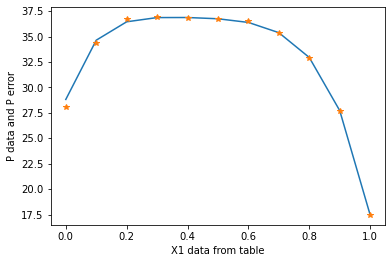

In [11]:
for i in range(0, len(x1knob)):
    p_error = ((x1knob[i]*math.exp(x[0]*((x[1]*x2knob[i])/(x[0]*x1knob[i] + x[1]*x2knob[i])) ** 2)) * psatw 
              + (x2knob[i]*math.exp(x[1]*((x[0]*x1knob[i])/(x[0]*x1knob[i] + x[1]*x2knob[i])) ** 2)* psatd))
    error = p[i] - p_error 
    print("Data of P from table ", p[i], "P error = ", p_error, "Error is ", error)
    p_err_data.append(p_error)

pyplot.plot(x1knob, p_err_data)
pyplot.plot(x1knob, p, '*')
pyplot.xlabel('X1 data from table')
pyplot.ylabel('P data and P error')
pyplot.show()

### Problem 2 (50 points) 

Solve the following problem using Bayesian Optimization:
$$
    \min_{x_1, x_2} \quad \left(4-2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2,
$$
for $x_1 \in [-3,3]$ and $x_2 \in [-2,2]$.

In [4]:

def black_func(x, y):
     return 1/(4 - 2.1 * x ** 2 + ((x ** 4) / 3) * x ** 2 + x * y + (-4 + 4 * y ** 2) * y ** 2)
    
from bayes_opt import BayesianOptimization
import numpy
import matplotlib as plt
from matplotlib import gridspec
X = []
Y = []
itr = []
t = []
bounds = {'x': (-3,3), 'y': (-2,2)}

optim = BayesianOptimization(f=black_func, pbounds=bounds, random_state=1)
optim.maximize(init_points=2,n_iter=10)
print(optim.max)

for i, res in enumerate(optim.res):
    print("Iteration {}: \n\t{}".format(i, res))
#     X.append(x)
#     Y.append(y)
#     itr.append(iter)
#     t.append(target)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.4252   | -0.4979   |  0.8813   |
|  2        |  0.004363 | -2.999    | -0.7907   |
|  3        |  0.3117   | -0.5814   |  1.057    |
|  4        |  0.3422   | -0.3102   |  0.4876   |
|  5        |  0.04594  | -2.104    |  0.5152   |
|  6        |  0.3345   | -0.3142   |  0.4566   |
|  7        |  0.2149   |  0.1121   |  1.061    |
|  8        |  0.7885   | -0.84     |  0.5745   |
|  9        |  0.7084   | -1.071    |  0.3112   |
|  10       |  8.34     | -1.183    |  0.7247   |
|  11       |  8.948    | -1.295    |  0.8243   |
|  12       |  0.04111  | -2.109    | -0.3733   |
{'target': 8.947749691096538, 'params': {'x': -1.294970077603155, 'y': 0.8243099161829229}}
Iteration 0: 
	{'target': 0.4251709708452254, 'params': {'x': -0.4978679717845562, 'y': 0.8812979737686324}}
Iteration 1: 
	{'target': 0.004362821965838803, 'params': {'x': -2.9993137510959307, 'y': -0.790669